In [1]:
#Import libaries needed for the analysis
import pylab
import calendar
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error



<h1>Bicycle Sharing Demand</h1><hr>
<h2>Data Modelling(Linear Regression)</h2><hr>
<h3>Data Fields</h3>
     <h5><li>datetime - hourly date + timestamp</li>
     <li>season - 1 = spring, 2 = summer, 3 = fall, 4 = winter</li>
     <li>holiday - whether the day is considered a holiday</li>
     <li>workingday - whether the day is neither a weekend nor holiday</li>
         <li>weather</li>
             <ul>1. Clear, Few clouds, Partly cloudy, Partly cloudy</ul>
             <ul>2. Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist</ul>
             <ul>3. Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds</ul>
             <ul>4. Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog</ul> 
     <li>temp - temperature in Celsius</li><br>
     <li>atemp - "feels like" temperature in Celsius</li>
     <li>humidity - relative humidity</li>
     <li>windspeed - wind speed</li>
     <li>casual - number of non-registered user rentals initiated</li>
     <li>registered - number of registered user rentals initiated</li>
     <li>count - number of total rentals (Dependent Variable)</li></h5>

<p>Lets Read In The Dataset


In [2]:
Bicycle = pd.read_csv("T.csv.csv")

<h2>Data Summary</h2>
    <p>As a first step lets do three simple steps on the dataset
        <li> 1. Size of the dataset.</li>
        <li> 2. Get a glimpse of data by printing few rows of it.</li>
        <li> 3. What type of variables contribute our data.</li></p>


In [3]:
#1.Size of the data
Bicycle.shape

(10886, 12)

In [4]:
#2.Sample Of First Few Rows
Bicycle.head()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
#3.Variables datatypes
Bicycle.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [6]:
#Using strptime function from time we splited the column datetime into time and month which we later converted to float 
time = []
month = []
for i in Bicycle['datetime']:
    datetm = datetime.strptime(i, "%Y-%m-%d %H:%M:%S")
    time.append(datetm.hour)
    month.append(datetm.month)
Bicycle['time'] = pd.DataFrame(time)
Bicycle['time'] = Bicycle['time'].astype(float)
Bicycle['month'] = pd.DataFrame(month)
Bicycle['month'] = Bicycle['month'].astype(float)


In [7]:
Bicycle.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,time,month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0.0,1.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1.0,1.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2.0,1.0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3.0,1.0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4.0,1.0


In [8]:
#check Null values
Bicycle.isnull().values.any()


False

<h4>Correlation Analysis</h4>
<p>One common to understand how a dependent variable is influenced by features (numerical) is to find a correlation matrix between them. we then carried out correlation and correlation plot between the variables.</p><br>


In [9]:
Bicycle.corr(method="pearson")

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,time,month
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439,-0.006546,0.971524
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393,-0.000354,0.001731
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594,0.002780,-0.003394
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655,-0.022740,0.012144
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454,0.145430,0.257589
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784,0.140343,0.264173
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371,-0.278011,0.204537
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369,0.146631,-0.150192
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414,0.302045,0.092722
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948,0.380540,0.169451


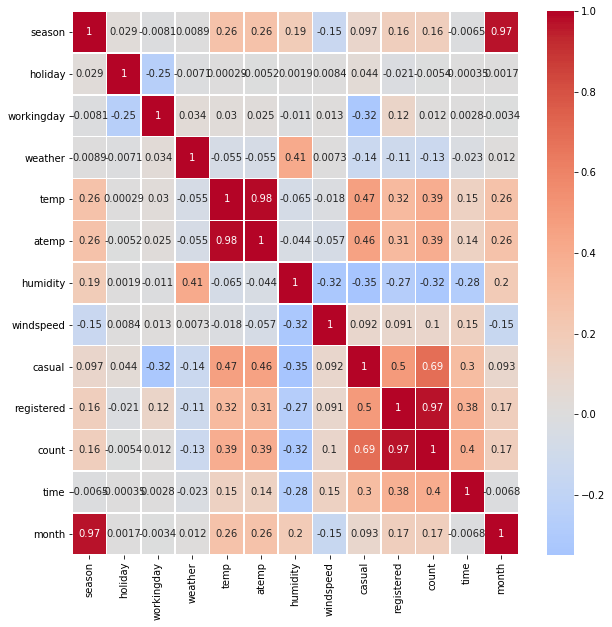

In [10]:
#correlation plot using sns.heatmap
plt.figure(figsize=(10,10))
sns.heatmap(Bicycle.corr(),annot=True,linewidth=0.5,center=0,cmap='coolwarm')
plt.show()

<h4>From the above correlation plot we can see that ;</h4>
 <li> 1. temp and humidity features has got positive and negative correlation with count respectively.Although the correlation between them are not very prominent still the count variable has got little dependency on "temp" and "humidity".</li>
 <li>2. windspeed is not gonna be really useful numerical feature and it is visible from it correlation value with "count"</li>
 <li>3. "atemp" is variable is not taken into since "atemp" and "temp" has got strong correlation with each other. During model building any one of the variable has to be dropped since they will exhibit multicollinearity in the data.</li>
 <li>4. "Casual" and "Registered" are also not taken into account since they are leakage variables in nature and need to be dropped during model building.</li>
  <li>5. "Seaseon" and "month" are strongly correlated, so one of them will be dropped one of them during model building</li>


In [11]:
categoryVariableList = ["season","weather","holiday","workingday"]
for var in categoryVariableList:
    Bicycle[var] = Bicycle[var].astype("category")

In [12]:
Bicycle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   datetime    10886 non-null  object  
 1   season      10886 non-null  category
 2   holiday     10886 non-null  category
 3   workingday  10886 non-null  category
 4   weather     10886 non-null  category
 5   temp        10886 non-null  float64 
 6   atemp       10886 non-null  float64 
 7   humidity    10886 non-null  int64   
 8   windspeed   10886 non-null  float64 
 9   casual      10886 non-null  int64   
 10  registered  10886 non-null  int64   
 11  count       10886 non-null  int64   
 12  time        10886 non-null  float64 
 13  month       10886 non-null  float64 
dtypes: category(4), float64(5), int64(4), object(1)
memory usage: 893.7+ KB


In [13]:
Bicycle.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,time,month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0.0,1.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1.0,1.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2.0,1.0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3.0,1.0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4.0,1.0


[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Weather'),
 Text(0.5, 1.0, 'Box Plot On Count Across Weather')]

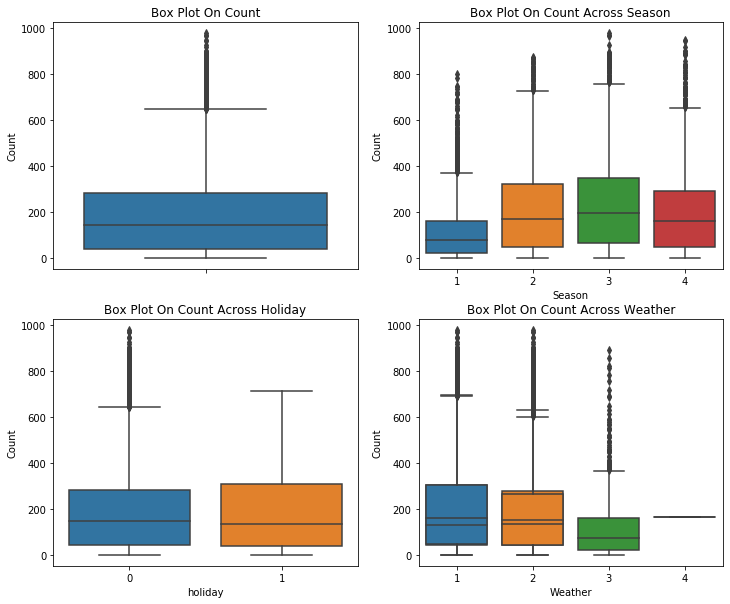

In [14]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(12, 10)
sns.boxplot(data=Bicycle,y="count",orient="v",ax=axes[0][0])
sns.boxplot(data=Bicycle,y="count",x="season",orient="v",ax=axes[0][1])
sns.boxplot(data=Bicycle,y="count",x="holiday",orient="v",ax=axes[1][0])
sns.boxplot(data=Bicycle,y="count",x="workingday",orient="v",ax=axes[1][1])
sns.boxplot(data=Bicycle,y="count",x="weather",orient="v",ax=axes[1][1])

axes[0][0].set(ylabel='Count',title="Box Plot On Count")
axes[0][1].set(xlabel='Season', ylabel='Count',title="Box Plot On Count Across Season")
axes[1][0].set(xlabel='holiday', ylabel='Count',title="Box Plot On Count Across Holiday")
axes[1][1].set(xlabel='Working Day', ylabel='Count',title="Box Plot On Count Across Working Day")
axes[1][1].set(xlabel='Weather', ylabel='Count',title="Box Plot On Count Across Weather")



In [15]:
Bicycle.drop(["atemp", "month",], axis = 1, inplace = True)


In [16]:
Bicycle.head()

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,count,time
0,2011-01-01 00:00:00,1,0,0,1,9.84,81,0.0,3,13,16,0.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,80,0.0,8,32,40,1.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,80,0.0,5,27,32,2.0
3,2011-01-01 03:00:00,1,0,0,1,9.84,75,0.0,3,10,13,3.0
4,2011-01-01 04:00:00,1,0,0,1,9.84,75,0.0,0,1,1,4.0


In [17]:
y = y = Bicycle["count"]

In [18]:
y.head()

0    16
1    40
2    32
3    13
4     1
Name: count, dtype: int64

In [19]:
x = Bicycle.drop(["count", "datetime", "casual"], axis = 1)


In [20]:
x.head()

,season,holiday,workingday,weather,temp,humidity,windspeed,registered,time
0,1,0,0,1,9.84,81,0.0,13,0.0
1,1,0,0,1,9.02,80,0.0,32,1.0
2,1,0,0,1,9.02,80,0.0,27,2.0
3,1,0,0,1,9.84,75,0.0,10,3.0
4,1,0,0,1,9.84,75,0.0,1,4.0


In [21]:
x = x.to_numpy()


In [22]:
y = y.to_numpy()


In [23]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [24]:
sc = StandardScaler()

In [25]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [26]:
reg = LinearRegression()


In [27]:
reg.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
w = reg.coef_


In [29]:
w

array([-1.47854194e-01, -2.17698525e+00, -1.92727701e+01,  1.87487649e+00,
        1.73703962e+01, -1.19988186e+01, -7.85139932e-01,  1.68595338e+02,
        2.99648226e+00])

In [30]:
b = reg.intercept_


In [31]:
b

191.5847496554895

In [32]:
y_ = reg.predict(X_test)


In [33]:
y_

array([146.35571102,  13.86292166, 202.61429175, ..., 454.38508148,
        17.45317117, 245.38359407])

In [34]:
reg.score(X_test,y_test)


0.9646197524122656

In [35]:
mean_squared_error(y_test, y_ , squared=False)

34.172994645150155

In [36]:
x[0]

array([1, 0, 0, 1, 9.84, 81, 0.0, 13, 0.0], dtype=object)

In [37]:
x[0].reshape(1,-1).shape


(1, 9)

In [38]:
reg.predict(x[0].reshape(1,-1))


array([1584.07155856])

In [39]:
y[0]


16

In [40]:
trst = np.arange(5, 23, 2)

In [41]:
tr = np.array([5.6, 7.3, 9.0, 11.2, 13.6, 14.5, 17.5, 19.8, 21.05])

In [42]:
print(tr, trst)

[ 5.6   7.3   9.   11.2  13.6  14.5  17.5  19.8  21.05] [ 5  7  9 11 13 15 17 19 21]


In [43]:
mean_squared_error(trst, tr, squared=True)

0.22138888888888894

In [44]:
pd.DataFrame(tr).describe()

,0
count,9.000000
mean,13.283333
std,5.473459
min,5.600000
25%,9.000000
50%,13.600000
75%,17.500000
max,21.050000
